# Using Logistic Regression and SVM to predict whether or not a person has diabetes or not 

PART 1 : PROBLEM STATEMENT

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.




PART 1.1: OBJECTIVE

Since the labels in the diabetes dataset are discrete, the observed variable ('Outcome') falls under two categories:- 
1 = The Person is diagnosed with diabetes
0 = The Person is not diagnosed with diabetes
In Machine learning, this problem is referred to as a classification problem. 



Part 1.2 Identify the Data Sources 

The Diabetes Dataset is availaible on Kaggle repository (https://www.kaggle.com/uciml/pima-indians-diabetes-database).The Dataset contains 768 rows and 9 columns.The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


In [ ]:
## Part 1.3 Load the dataset
The file is loaded using additional ottional in the pandas read_csv function and other essential libraries are imported.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
data = pd.read_csv("diabetes.csv")

In [6]:
## Inspecting the data
The first step is to visualize the dataset.In order to display the first few records, the DataFrame data.head() command is used to display first few rows of the dataset.  

SyntaxError: invalid syntax (<ipython-input-6-3c74579c3476>, line 2)

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape


(768, 9)

In [9]:
In the result displayed , there are 768 rows and 9 columns in total.

SyntaxError: invalid syntax (<ipython-input-9-2c6faaa455a5>, line 1)

In [10]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
The info() method provides a concise summary of the data;it provides the data of each column, the number of non-null values in each column,how much memory the dataframe is using.

SyntaxError: invalid syntax (<ipython-input-12-56f897b187ba>, line 1)

In [14]:

data.Outcome
data.Glucose


0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Part 2 Exploratory Data Analysis 
The goal here is to observe which feature/predictor variable is good in relation with the observed variable that is 'Outcome'.A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).
It can determine that whether an attribute is skewed,Gaussian or even has an exponential distribution.It can even determine the outliers.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

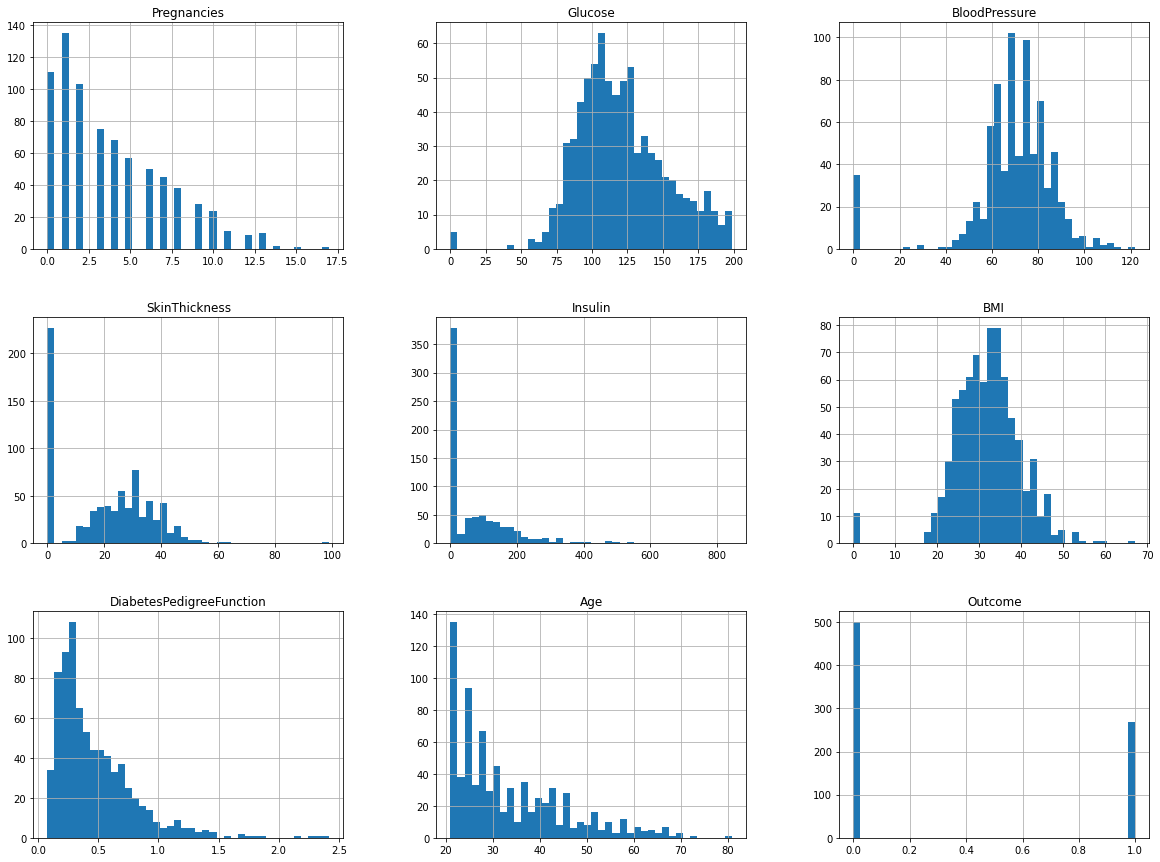

In [49]:
data.hist(bins=40 , figsize=(20,15))

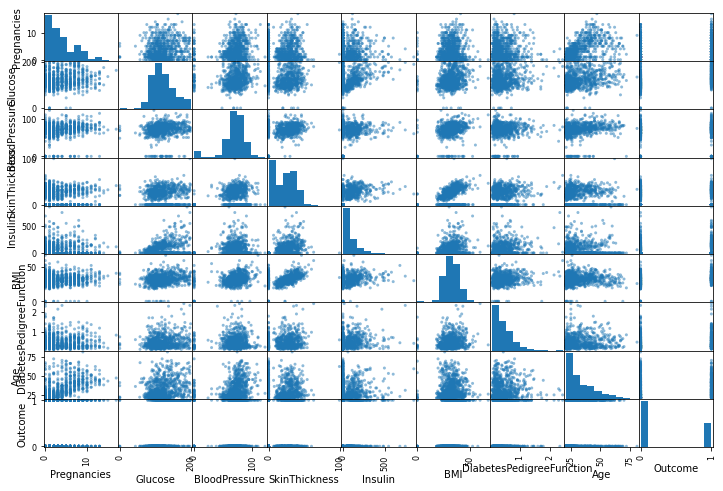

In [50]:
##Using pandas.plotting function to plot scatter graphs
from pandas.plotting import scatter_matrix
scatter_matrix((data),figsize=(12,8))
plt.show()

## Multimodal Data Visualizations 
It displays Scatter plots and Heatmaps which are the types of multimodal visualizations.

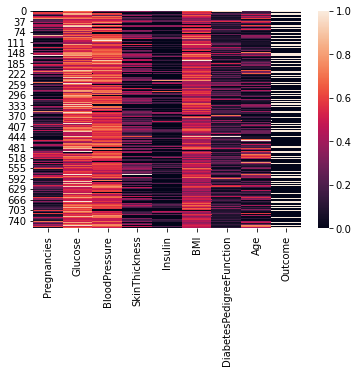

In [64]:
#heatmap using seaborn library
import seaborn as sns
sns.heatmap(data)
plt.show()

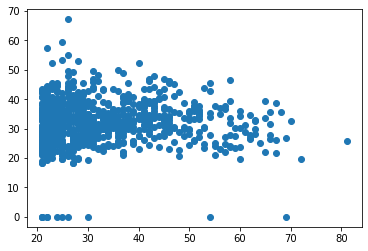

In [51]:
plt.scatter(data["Age"],data['BMI'])

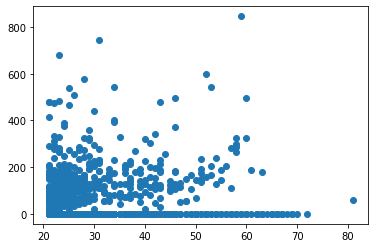

In [52]:
plt.scatter(data["Age"],data["Insulin"])

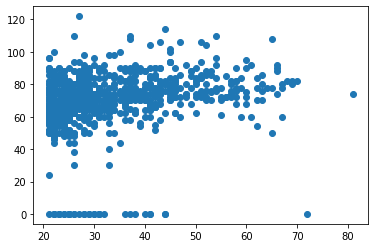

In [53]:
plt.scatter(data["Age"],data["BloodPressure"])

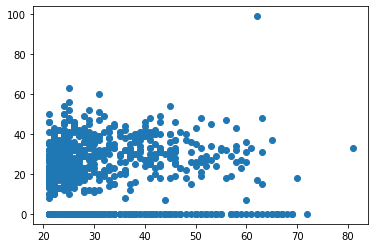

In [54]:
plt.scatter(data['Age'],data["SkinThickness"])

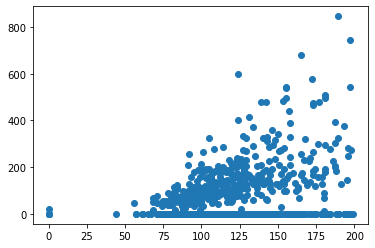

In [56]:
plt.scatter(data["Glucose"],data["Insulin"])

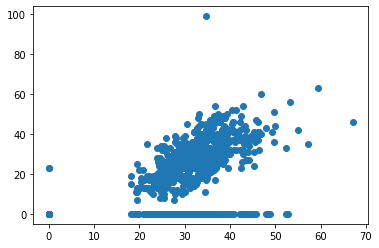

In [57]:
plt.scatter(data["BMI"],data["SkinThickness"])

In [65]:
#correlation of variables with outcome variable
data_matrix = data.corr()['Outcome']

In [66]:
data_matrix


Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

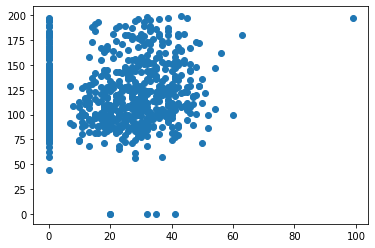

In [59]:
plt.scatter(data["SkinThickness"],data["Glucose"])


In [60]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
##Observation for the correlation
We see that there is a moderately strong correlation between Glucose and the Outcome Variable of 0.46.The other parameters are weakly correlated with the Outcome.

## Part 3 Pre-Processing the Data
Here we will handle the missing values in the dataset and normalizing the features of the dataset.
We use sklearn to import Min-Max Scaler to transform the data variables in the range between zero and one.


In [61]:
#all the the columns are transformed except the 'Outcome' variable column using sklearn.
from sklearn.preprocessing import MinMaxScaler
cols_to_norm=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])

In [62]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [ ]:
#In order to process the model accuracy we split the data in training and testing where the test size is 20 percent and 80 percent is the train size.

In [67]:
#train test split using scikit learn
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data , test_size=0.2,random_state=42)

In [68]:
train_set


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000,0
618,0.529412,0.562814,0.672131,0.242424,0.000000,0.420268,0.514091,0.483333,1
346,0.058824,0.698492,0.377049,0.191919,0.098109,0.427720,0.245944,0.016667,0
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333,0
231,0.352941,0.673367,0.655738,0.373737,0.437352,0.688525,0.068318,0.416667,1
...,...,...,...,...,...,...,...,...,...
71,0.294118,0.698492,0.524590,0.353535,0.165485,0.426230,0.142186,0.083333,0
106,0.058824,0.482412,1.000000,0.000000,0.000000,0.333830,0.055081,0.100000,0
270,0.588235,0.507538,0.704918,0.373737,0.000000,0.679583,0.451751,0.283333,1
435,0.000000,0.708543,0.000000,0.000000,0.000000,0.631893,0.054227,0.133333,1


In [69]:
test_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,0.352941,0.492462,0.475410,0.333333,0.224586,0.506706,0.150299,0.366667,0
324,0.117647,0.562814,0.614754,0.323232,0.000000,0.532042,0.029889,0.000000,0
624,0.117647,0.542714,0.524590,0.000000,0.000000,0.459016,0.034159,0.000000,0
690,0.470588,0.537688,0.655738,0.000000,0.000000,0.366617,0.332195,0.216667,0
473,0.411765,0.683417,0.737705,0.000000,0.000000,0.445604,0.056362,0.483333,0
...,...,...,...,...,...,...,...,...,...
355,0.529412,0.829146,0.721311,0.000000,0.000000,0.453055,0.095645,0.466667,1
534,0.058824,0.386935,0.459016,0.303030,0.066194,0.496274,0.500854,0.050000,0
344,0.470588,0.477387,0.590164,0.000000,0.000000,0.548435,0.173783,0.600000,0
296,0.117647,0.733668,0.573770,0.383838,0.425532,0.417288,0.110589,0.133333,1


In [ ]:
## Now to predict the 'outcome' variable based on the other predictor variables, we use a classification algorithm, namely logistic regression

In [70]:
#training the  using logistic regression
from sklearn.linear_model import LogisticRegression

In [71]:
log_reg = LogisticRegression()

In [72]:
log_reg.fit(train_set[cols_to_norm],train_set['Outcome'])

LogisticRegression()

In [75]:
#prediction on test set
y_proba = log_reg.predict(test_set[cols_to_norm])


In [76]:
y_proba

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [78]:
#using log loss function to return y_predicted values for its training data y_true

from sklearn.metrics import log_loss
loss_all_col = log_loss(test_set["Outcome"],y_proba)

In [79]:
loss_all_col

8.074067175216735

In [80]:
log_reg1 = LogisticRegression()

In [85]:
#while selecting columns use double square brackets 
log_reg1.fit(train_set[['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']],train_set['Outcome'])

LogisticRegression()

In [87]:
y_proba1 = log_reg1.predict(test_set[['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [88]:
y_proba1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [93]:
loss_col = log_loss(test_set['Outcome'],y_proba1)

In [94]:
loss_col


8.074067175216735

## Accuracy of the model

To check the accuracy of the classifier we import accuracy_score from sklearn.metrics library

In [95]:


from sklearn.metrics import accuracy_score

In [99]:
accuracy = accuracy_score(test_set['Outcome'],y_proba)

In [98]:
accuracy

0.7662337662337663

In [101]:
##model2 removing insulin , blood pressure , skin thickness , diabetes pedigree function
log_reg2 = LogisticRegression()

In [103]:
log_reg2.fit(train_set[['Pregnancies', 'Glucose',
       'BMI', 'Age']],train_set["Outcome"])

LogisticRegression()

In [104]:
y_proba2 = log_reg2.predict(test_set[['Pregnancies', 'Glucose',
       'BMI', 'Age']])

In [105]:
y_proba2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [106]:
accuracy1 = accuracy_score(test_set['Outcome'],y_proba2)

In [107]:
accuracy1

0.7597402597402597

In [ ]:
##  Cross validation 

We will use Kfold sampling in which we will run the model analysis on each fold to average out the overall estimate error.This will serve as a performance metric for the model.

In [109]:
#using cross validation(kfold)
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(log_reg2,data[cols_to_norm],data['Outcome'],cv=10)
print(scores)

[0.75324675 0.74025974 0.79220779 0.7012987  0.74025974 0.80519481
 0.75324675 0.79220779 0.72368421 0.84210526]


## SVM

We will use another classifier known as  Support Vector Machine.
The important parameters in kernel SVMs are the

Regularization parameter C,
The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
Kernel-specific parameters.
gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [112]:
#SVM(Support Vector Machine)
from sklearn.svm import LinearSVC

In [139]:
#C -> Regularization parameter
#hinge function -> inverse of RELU (The hinge loss is used for "maximum-margin" classification, )
linear_svc = LinearSVC(C=1 , loss="hinge")

In [140]:
linear_svc.fit(train_set[cols_to_norm],train_set['Outcome'])

LinearSVC(C=1, loss='hinge')

In [141]:
y_prob_svc=linear_svc.predict(test_set[cols_to_norm])

In [142]:
y_prob_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [143]:
accuracy3_svc = accuracy_score(test_set['Outcome'], y_prob_svc)
print(f"Accuracy1 : {accuracy3_svc}")

Accuracy1 : 0.7792207792207793


## Conclusion

We compare the accuracies of both the models, and it turns out that the SVM model accuracy is 0.779 > accuracy of logistic regression 0.776. Therefore for the diabetes dataset, SVM proved to be the better classifier in this scenario.
The accuracy can further be improved using polynomial kernel parameter in SVM.
